In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
print(df_train.shape[0])
df_train.sample()

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
14456,14456,0.3,Premium,F,SI2,62.3,58.0,4.32,4.28,2.68,6.227


In [4]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
10545,10545,0.25,Ideal,E,VVS2,62.1,57.0,4.04,4.07,2.52


In [5]:
cut_type = {
    'Ideal': 5,
    'Premium': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1
}

df_train['cut'] = df_train['cut'].map(cut_type)

In [6]:
color_type = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
}

df_train['color'] = df_train['color'].map(color_type)

In [7]:
clarity_type = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1

}

df_train['clarity'] = df_train['clarity'].map(clarity_type)

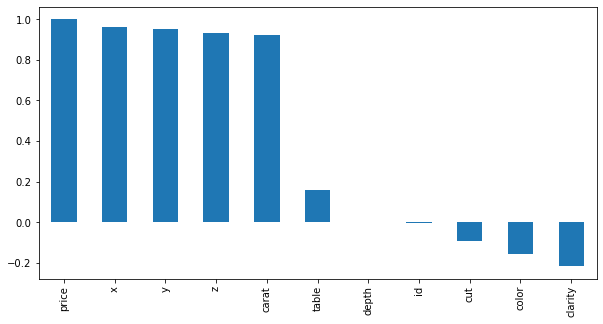

In [8]:
corr_mat = df_train.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');

In [9]:
df_train.drop(['depth','table'], axis = 1, inplace = True) 

In [10]:
df_train

,id,carat,cut,color,clarity,x,y,z,price
0,0,1.02,2,7,4,6.36,6.40,4.03,8.928
1,1,0.35,3,3,6,4.54,4.57,2.77,6.477
2,2,0.31,4,3,7,4.43,4.40,2.67,6.810
3,3,0.38,5,6,5,4.66,4.69,2.87,6.824
4,4,1.64,5,4,6,7.59,7.60,4.69,9.776
...,...,...,...,...,...,...,...,...,...
40450,40450,1.20,5,4,6,6.77,6.81,4.23,9.149
40451,40451,1.50,2,3,5,7.30,7.09,4.62,9.077
40452,40452,1.06,5,6,4,6.54,6.58,4.06,8.892
40453,40453,0.31,4,7,2,4.40,4.38,2.64,6.385


In [11]:
X = df_train.iloc[:,:-1]
y = df_train['price']

In [12]:
model = RandomForestRegressor(max_depth = 70, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 400)
model.fit(X, y)

RandomForestRegressor(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=400)

In [13]:
df_test['cut'] = df_test['cut'].map(cut_type)
df_test['color'] = df_test['color'].map(color_type)
df_test['clarity'] = df_test['clarity'].map(clarity_type)
df_test.drop(['depth', 'table'], axis = 1, inplace = True) 

In [14]:
y_pred = model.predict(df_test)
y_pred

array([8.10940009, 6.75691777, 6.76353162, ..., 9.28097603, 7.04071888,
       9.70388475])

In [15]:
df_test['price'] = y_pred
df_for_submission = df_test[["id", "price"]]

In [16]:
df_for_submission.to_csv("my_submission.csv", index=False)